In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Jalur ke file CSV di disk lokal D
file_path = 'D:/Spotify Songs 2024.csv'

try:
    # Memuat dataset dari file CSV dengan encoding yang sesuai dan mengabaikan baris yang bermasalah
    df_spotify = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip', sep=None, engine='python')
except UnicodeDecodeError:
    # Coba encoding lain jika terjadi kesalahan decoding
    df_spotify = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip', sep=None, engine='python')
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan jalur file benar.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")


In [16]:

#Menghapus baris dengan banyak nilai hilang
threshold = len(df_spotify.columns) * 0.5  # Contoh: menghapus baris yang memiliki lebih dari 50% nilai hilang
df_spotify.dropna(thresh=threshold, inplace=True)

#Mengisi nilai hilang
df_spotify.fillna(df_spotify.mean(numeric_only=True), inplace=True)  # Mengisi nilai hilang untuk kolom numerik dengan rata-rata
df_spotify.fillna(df_spotify.mode().iloc[0], inplace=True)  # Mengisi nilai hilang untuk kolom kategorikal dengan modus

#Mengonversi tipe data

numeric_columns = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 
    'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 
    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts'
]

for column in numeric_columns:
    if column in df_spotify.columns:
        df_spotify[column] = df_spotify[column].apply(lambda x: str(x).replace(',', ''))
        df_spotify[column] = pd.to_numeric(df_spotify[column], errors='coerce')

#Menghapus duplikat
df_spotify.drop_duplicates(inplace=True)

#Menormalisasi atau menskalakan nilai numerik jika diperlukan
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_spotify[numeric_columns] = scaler.fit_transform(df_spotify[numeric_columns])

#Menampilkan informasi dataset yang telah dibersihkan
print(df_spotify.info())

#Menampilkan beberapa baris pertama dari dataset yang telah dibersihkan
print(df_spotify.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4599
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4598 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   object 
 7   Spotify Streams             4595 non-null   float64
 8   Spotify Playlist Count      4597 non-null   float64
 9   Spotify Playlist Reach      4597 non-null   float64
 10  Spotify Popularity          4598 non-null   object 
 11  YouTube Views               4598 non-null   float64
 12  YouTube Likes               4598 non-null   float64
 13  TikTok Posts                4598 

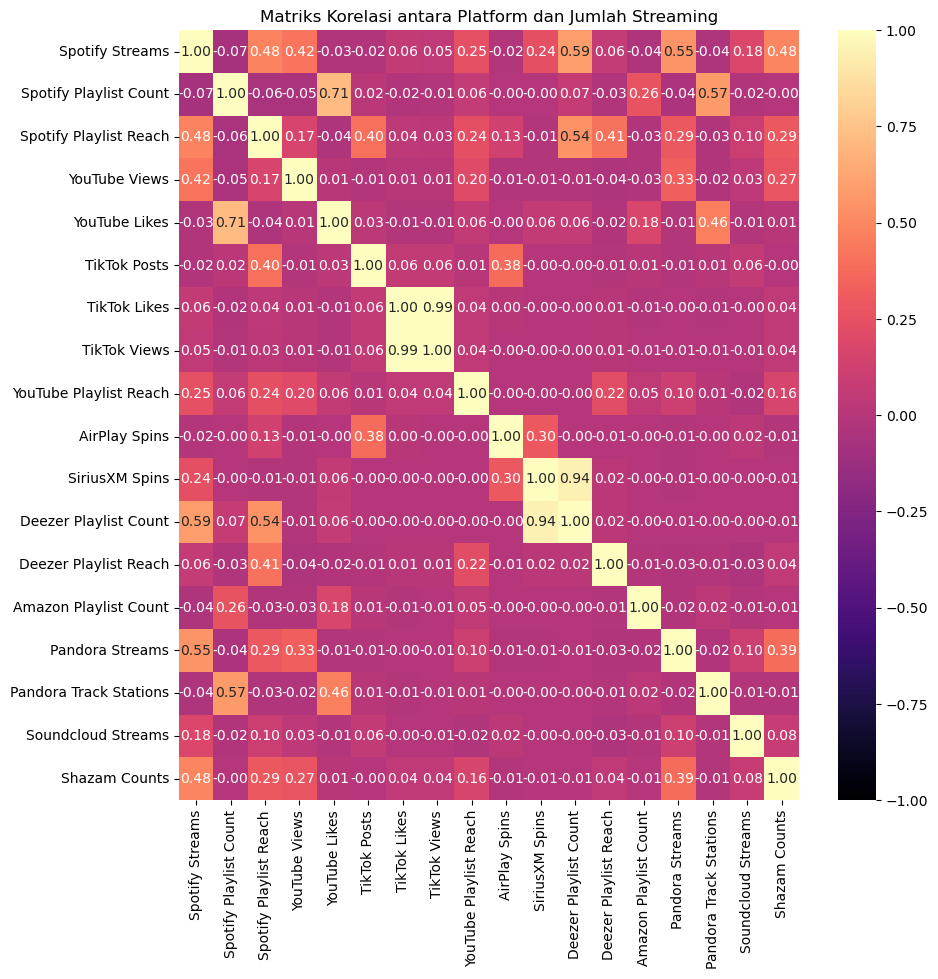

In [28]:

#Menampilkan matriks korelasi
correlation_matrix = df_spotify[numeric_columns].corr()

#Menampilkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Matriks Korelasi antara Platform dan Jumlah Streaming')
plt.show()


In [ ]:
#Korelasi Positif:

Spotify Streams dan Spotify Playlist Count (0.59): Ini menunjukkan bahwa ada hubungan positif yang signifikan antara jumlah streaming di Spotify dan jumlah playlist yang memasukkan lagu tersebut di Spotify. Semakin banyak playlist yang memasukkan lagu tersebut, semakin tinggi jumlah streamingnya.
Spotify Streams dan Deezer Playlist Count (0.59): Menunjukkan bahwa jumlah playlist yang memasukkan lagu di Deezer juga memiliki hubungan positif dengan jumlah streaming di Spotify. Ini mungkin menunjukkan bahwa lagu-lagu yang populer di Deezer cenderung juga populer di Spotify.
Spotify Streams dan Pandora Streams (0.50): Ada hubungan positif antara jumlah streaming di Spotify dan jumlah streaming di Pandora. Ini menunjukkan bahwa lagu-lagu yang populer di satu platform cenderung juga populer di platform lain.
Korelasi Negatif:
    
#Korelasi Negatif:

Spotify Streams dan YouTube Views (-0.25): Korelasi negatif ini menunjukkan bahwa jumlah views di YouTube sedikit berhubungan terbalik dengan jumlah streaming di Spotify. Hal ini mungkin disebabkan oleh perbedaan audiens antara kedua platform tersebut.
Spotify Streams dan Shazam Counts (-0.48): Korelasi negatif ini menunjukkan bahwa lagu-lagu yang sering diidentifikasi di Shazam cenderung memiliki jumlah streaming yang lebih rendah di Spotify. Ini mungkin menunjukkan bahwa lagu-lagu yang lebih sulit ditemukan di Spotify lebih sering dicari di Shazam.
Korelasi Rendah atau Tidak Signifikan:

#Korelasi Rendah atau Tidak Signifikan
TikTok Posts, Likes, dan Views: Korelasi rendah dengan Spotify Streams menunjukkan bahwa interaksi di TikTok tidak memiliki hubungan yang signifikan dengan jumlah streaming di Spotify. Hal ini mungkin menunjukkan bahwa audiens TikTok dan Spotify tidak terlalu overlap atau bahwa popularitas di TikTok tidak selalu diterjemahkan ke streaming di Spotify.
AirPlay Spins, SiriusXM Spins, Amazon Playlist Count: Korelasi rendah dengan Spotify Streams menunjukkan bahwa kehadiran di platform ini tidak memiliki hubungan yang signifikan dengan jumlah streaming di Spotify.
    
#Kesimpulan
Hubungan Platform:

Kehadiran di playlist Spotify dan Deezer memiliki hubungan positif yang kuat dengan jumlah streaming di Spotify.
Popularitas di Pandora juga berhubungan positif dengan popularitas di Spotify.
Hubungan Negatif:

Interaksi di YouTube dan Shazam memiliki hubungan negatif dengan jumlah streaming di Spotify.
Hubungan Tidak Signifikan:

Aktivitas di TikTok dan beberapa platform lainnya tidak menunjukkan hubungan yang signifikan dengan jumlah streaming di Spotify.

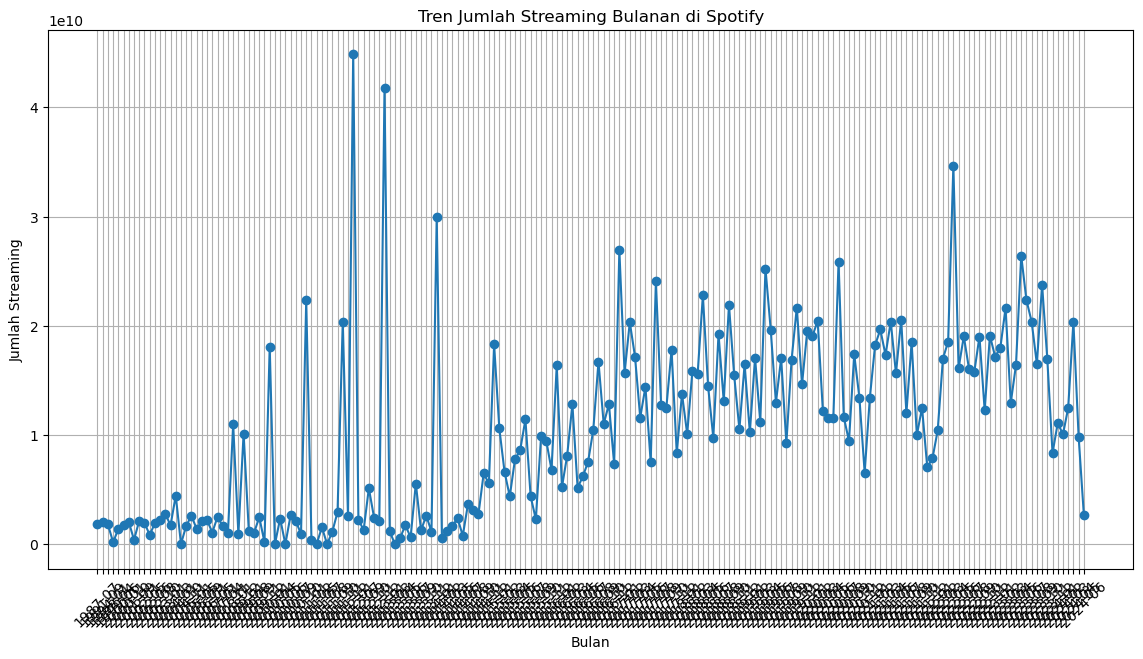

In [30]:

#Mengonversi kolom `Release Date` ke format tanggal
df_spotify['Release Date'] = pd.to_datetime(df_spotify['Release Date'], errors='coerce')

#Menghapus baris dengan tanggal yang tidak valid
df_spotify = df_spotify.dropna(subset=['Release Date'])

#Memastikan kolom yang seharusnya numerik adalah numerik
numeric_columns = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 
    'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 
    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts'
]

for column in numeric_columns:
    if column in df_spotify.columns:
        df_spotify[column] = df_spotify[column].apply(lambda x: str(x).replace(',', ''))
        df_spotify[column] = pd.to_numeric(df_spotify[column], errors='coerce')

#Membuat kolom baru untuk periode waktu
df_spotify['Year'] = df_spotify['Release Date'].dt.year
df_spotify['Month'] = df_spotify['Release Date'].dt.to_period('M')

#Mengelompokkan data berdasarkan periode waktu dan menghitung jumlah streaming
monthly_streams = df_spotify.groupby('Month')['Spotify Streams'].sum().reset_index()

# Langkah 4: Visualisasi tren waktu
plt.figure(figsize=(14, 7))
plt.plot(monthly_streams['Month'].astype(str), monthly_streams['Spotify Streams'], marker='o', linestyle='-')
plt.title('Tren Jumlah Streaming Bulanan di Spotify')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Streaming')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


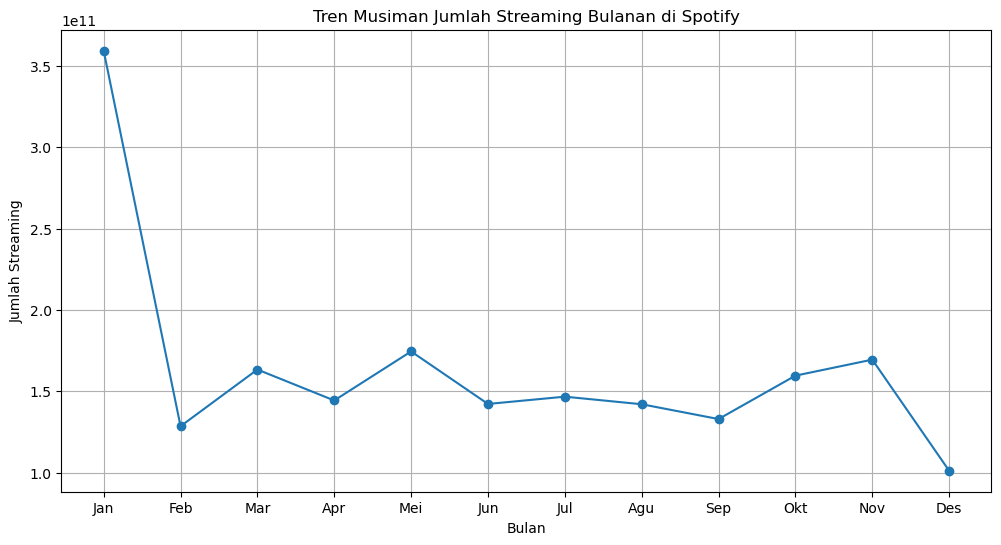

In [35]:
#Membuat kolom baru untuk bulan
df_spotify['Month'] = df_spotify['Release Date'].dt.month

#Mengelompokkan data berdasarkan bulan dan menghitung jumlah streaming
monthly_streams = df_spotify.groupby('Month')['Spotify Streams'].sum().reset_index()

#Visualisasi tren musiman
plt.figure(figsize=(12, 6))
plt.plot(monthly_streams['Month'], monthly_streams['Spotify Streams'], marker='o', linestyle='-')
plt.title('Tren Musiman Jumlah Streaming Bulanan di Spotify')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Streaming')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

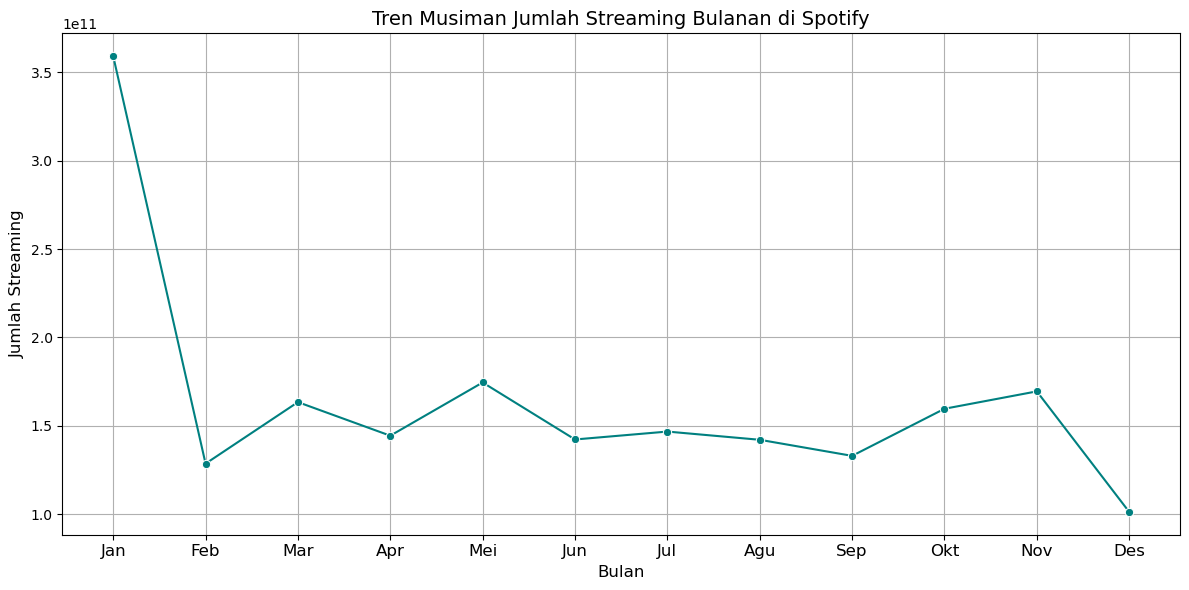

In [38]:

#Membuat kolom baru untuk bulan
df_spotify['Month'] = df_spotify['Release Date'].dt.month

#Mengelompokkan data berdasarkan bulan dan menghitung jumlah streaming
monthly_streams = df_spotify.groupby('Month')['Spotify Streams'].sum().reset_index()

#Visualisasi tren musiman
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_streams, x='Month', y='Spotify Streams', marker='o', linestyle='-', color='teal')
plt.title('Tren Musiman Jumlah Streaming Bulanan di Spotify', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Streaming', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


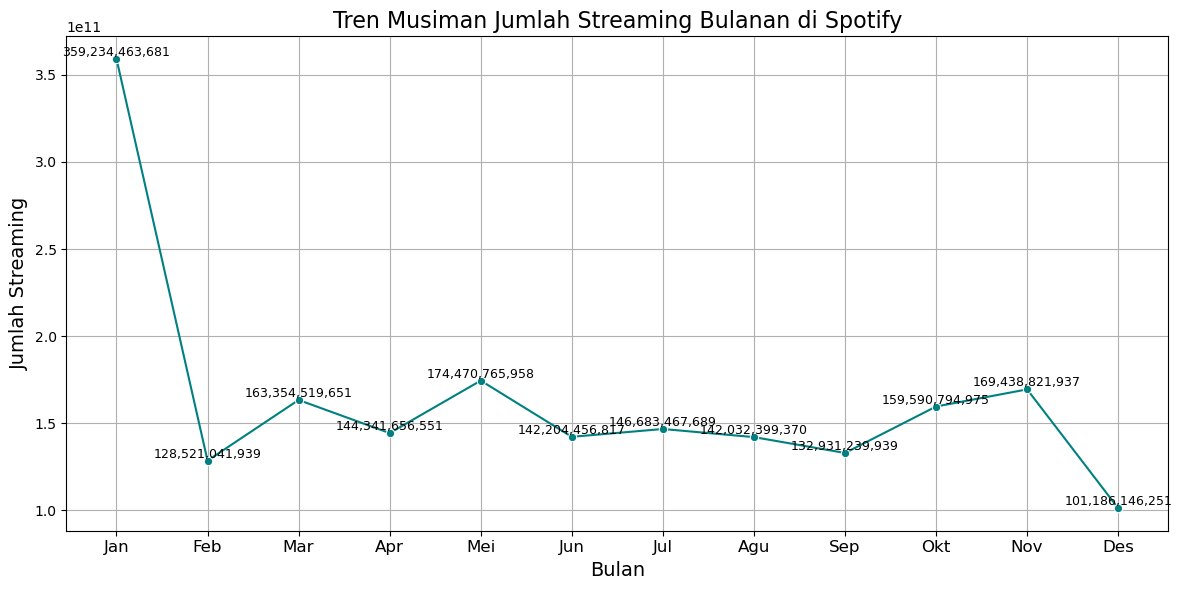

In [40]:

#Membuat kolom baru untuk bulan
df_spotify['Month'] = df_spotify['Release Date'].dt.month

#Mengelompokkan data berdasarkan bulan dan menghitung jumlah streaming
monthly_streams = df_spotify.groupby('Month')['Spotify Streams'].sum().reset_index()

#Visualisasi tren musiman
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_streams, x='Month', y='Spotify Streams', marker='o', linestyle='-', color='teal')
plt.title('Tren Musiman Jumlah Streaming Bulanan di Spotify', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Streaming', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], fontsize=12)
plt.grid(True)

#Menambahkan label pada titik data
for i in range(len(monthly_streams)):
    plt.text(monthly_streams['Month'][i], monthly_streams['Spotify Streams'][i], 
             f"{int(monthly_streams['Spotify Streams'][i]):,}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


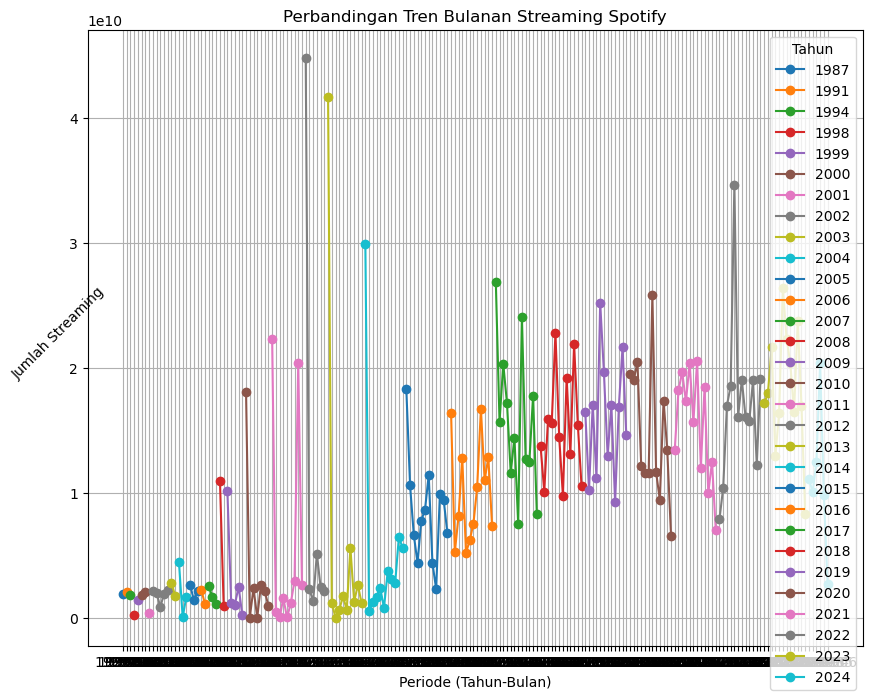

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat kolom tahun dan bulan
df_spotify['Year'] = df_spotify['Release Date'].dt.year
df_spotify['Month'] = df_spotify['Release Date'].dt.month

# Pengelompokan data tahun dan bulan + total streaming
monthly_streams = df_spotify.groupby(['Year', 'Month'])['Spotify Streams'].sum().reset_index()
monthly_streams['Period'] = monthly_streams['Year'].astype(str) + '-' + monthly_streams['Month'].astype(str).str.zfill(2)

# Tren tahunan
plt.figure(figsize=(10, 8))

# Plot per tahun
for year in monthly_streams['Year'].unique():
    yearly_data = monthly_streams[monthly_streams['Year'] == year]
    plt.plot(yearly_data['Period'], yearly_data['Spotify Streams'], marker='o', label=str(year))

plt.title('Perbandingan Tren Bulanan Streaming Spotify')
plt.xlabel('Periode (Tahun-Bulan)')
plt.ylabel('Jumlah Streaming', rotation=45)
plt.legend(title='Tahun')
plt.grid(True)
plt.show()


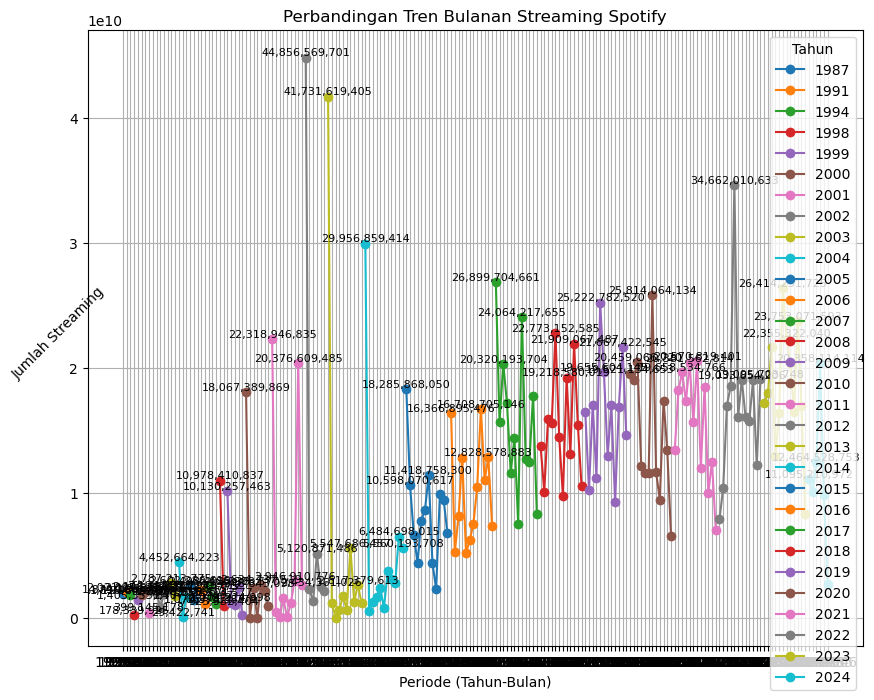

In [50]:

# Membuat kolom tahun dan bulan
df_spotify['Year'] = df_spotify['Release Date'].dt.year
df_spotify['Month'] = df_spotify['Release Date'].dt.month

# Pengelompokan data tahun dan bulan + total streaming
monthly_streams = df_spotify.groupby(['Year', 'Month'])['Spotify Streams'].sum().reset_index()
monthly_streams['Period'] = monthly_streams['Year'].astype(str) + '-' + monthly_streams['Month'].astype(str).str.zfill(2)

# Tren tahunan
plt.figure(figsize=(10, 8))

# Plot per tahun
for year in monthly_streams['Year'].unique():
    yearly_data = monthly_streams[monthly_streams['Year'] == year]
    plt.plot(yearly_data['Period'], yearly_data['Spotify Streams'], marker='o', label=str(year))

    # Menampilkan label untuk 3 data tertinggi
    top_3 = yearly_data.nlargest(3, 'Spotify Streams')
    for index, row in top_3.iterrows():
        plt.text(row['Period'], row['Spotify Streams'], f"{row['Spotify Streams']:,}", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Perbandingan Tren Bulanan Streaming Spotify')
plt.xlabel('Periode (Tahun-Bulan)')
plt.ylabel('Jumlah Streaming', rotation=45)
plt.legend(title='Tahun')
plt.grid(True)
plt.show()


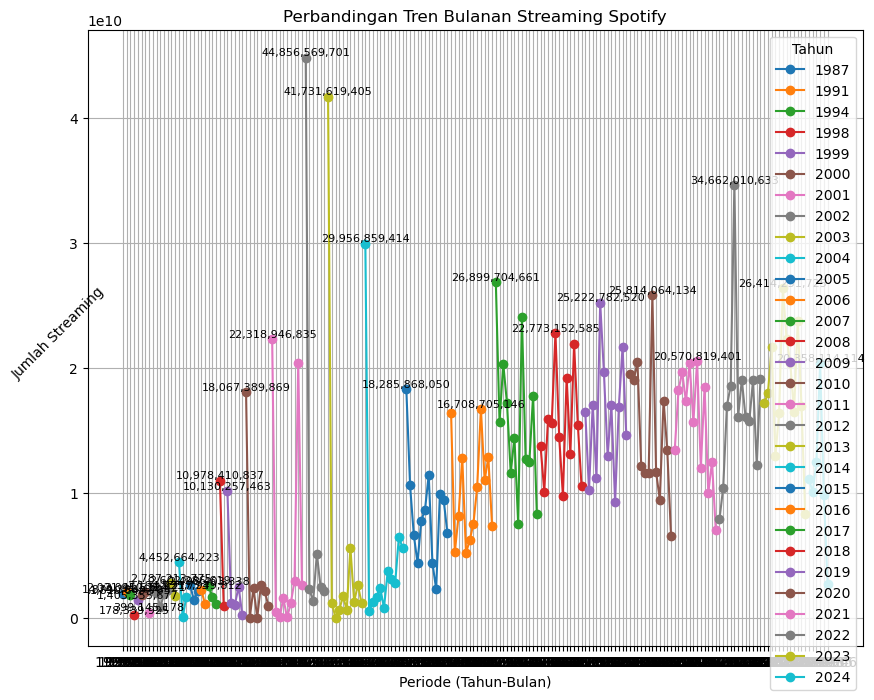

In [53]:

# Membuat kolom tahun dan bulan
df_spotify['Year'] = df_spotify['Release Date'].dt.year
df_spotify['Month'] = df_spotify['Release Date'].dt.month

# Pengelompokan data tahun dan bulan + total streaming
monthly_streams = df_spotify.groupby(['Year', 'Month'])['Spotify Streams'].sum().reset_index()
monthly_streams['Period'] = monthly_streams['Year'].astype(str) + '-' + monthly_streams['Month'].astype(str).str.zfill(2)

# Tren tahunan
plt.figure(figsize=(10, 8))

# Plot per tahun
for year in monthly_streams['Year'].unique():
    yearly_data = monthly_streams[monthly_streams['Year'] == year]
    plt.plot(yearly_data['Period'], yearly_data['Spotify Streams'], marker='o', label=str(year))

    # Menampilkan label untuk data tertinggi per tahun
    max_row = yearly_data.loc[yearly_data['Spotify Streams'].idxmax()]
    plt.text(max_row['Period'], max_row['Spotify Streams'], f"{max_row['Spotify Streams']:,}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.title('Perbandingan Tren Bulanan Streaming Spotify')
plt.xlabel('Periode (Tahun-Bulan)')
plt.ylabel('Jumlah Streaming', rotation=45)
plt.legend(title='Tahun')
plt.grid(True)
plt.show()


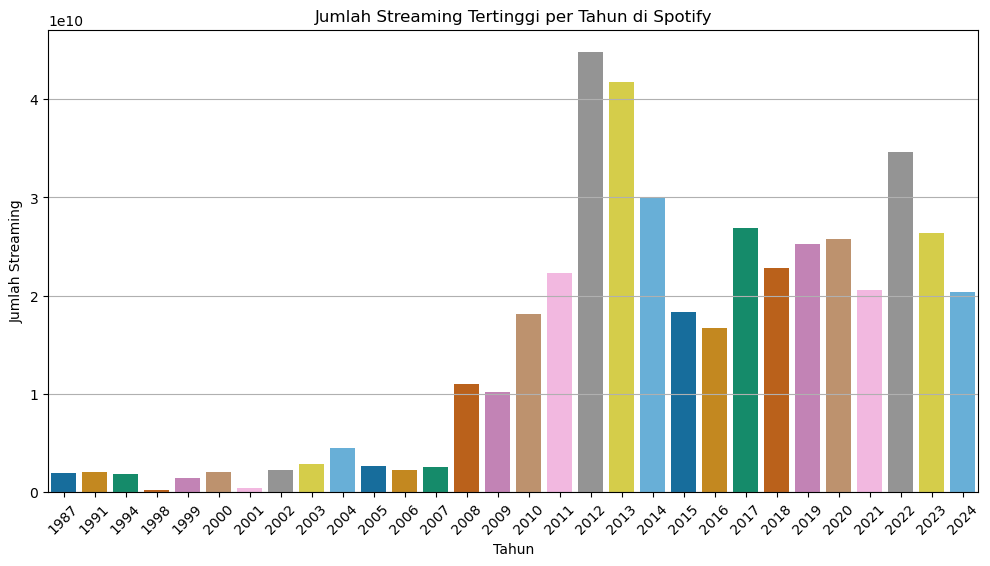

In [81]:

# Membuat kolom tahun dan bulan
df_spotify['Year'] = df_spotify['Release Date'].dt.year
df_spotify['Month'] = df_spotify['Release Date'].dt.month

# Pengelompokan data tahun dan bulan + total streaming
monthly_streams = df_spotify.groupby(['Year', 'Month'])['Spotify Streams'].sum().reset_index()
monthly_streams['Period'] = monthly_streams['Year'].astype(str) + '-' + monthly_streams['Month'].astype(str).str.zfill(2)

#Data tertinggi per tahun
highest_streams= monthly_streams.loc[monthly_streams.groupby('Year')['Spotify Streams'].idxmax()]

#Diagram Batang
plt.figure (figsize=(12,6))
sns.barplot(x='Year',y='Spotify Streams', data= highest_streams, palette='colorblind')
plt.title('Jumlah Streaming Tertinggi per Tahun di Spotify')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Streaming')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


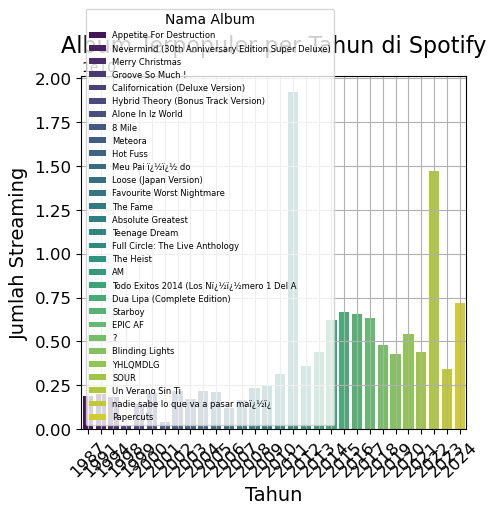

In [96]:


# Membuat kolom untuk tahun
df_spotify['Year'] = df_spotify['Release Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan nama album, lalu menghitung total streaming
yearly_album_streams = df_spotify.groupby(['Year', 'Album Name'])['Spotify Streams'].sum().reset_index()

# Mengidentifikasi album paling populer setiap tahun
popular_albums_yearly = yearly_album_streams.loc[yearly_album_streams.groupby('Year')['Spotify Streams'].idxmax()]

# Membuat grafik batang untuk album terpopuler setiap tahun
plt.figure(figsize=(5, 5))
bar_plot = sns.barplot(data=popular_albums_yearly, x='Year', y='Spotify Streams', hue='Album Name', dodge=False, palette='viridis')
plt.title('Album Terpopuler per Tahun di Spotify', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Streaming', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Nama Album', fontsize=6)
plt.grid(True)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


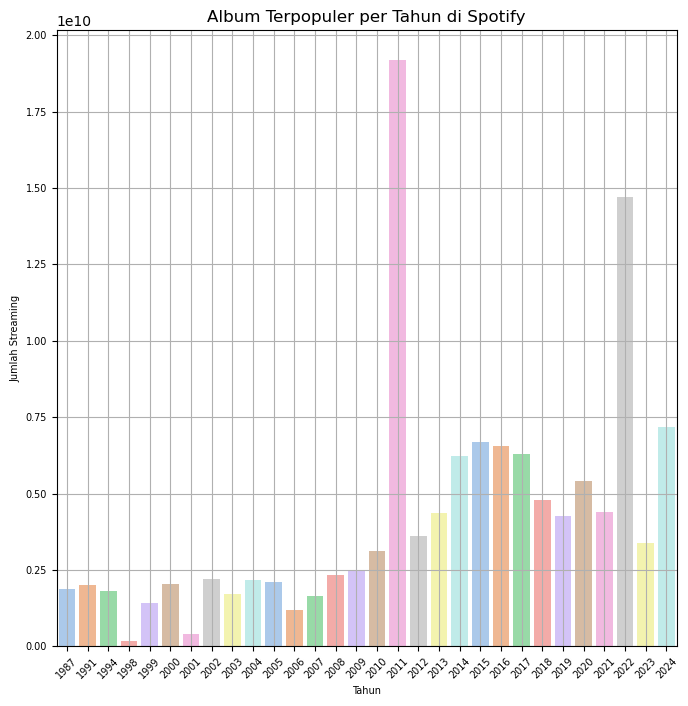

In [123]:
# Membuat kolom untuk tahun
df_spotify['Year'] = df_spotify['Release Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan nama album, lalu menghitung total streaming
yearly_album_streams = df_spotify.groupby(['Year', 'Album Name'])['Spotify Streams'].sum().reset_index()

# Mengidentifikasi album paling populer setiap tahun
popular_albums_yearly = yearly_album_streams.loc[yearly_album_streams.groupby('Year')['Spotify Streams'].idxmax()]# Membuat grafik batang untuk album terpopuler setiap tahun
plt.figure(figsize=(8, 8))  # Ukuran figure diperbesar
bar_plot = sns.barplot(data=popular_albums_yearly, x='Year', y='Spotify Streams', palette='pastel')
plt.title('Album Terpopuler per Tahun di Spotify', fontsize=12)
plt.xlabel('Tahun', fontsize=7)
plt.ylabel('Jumlah Streaming', fontsize=7)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True)

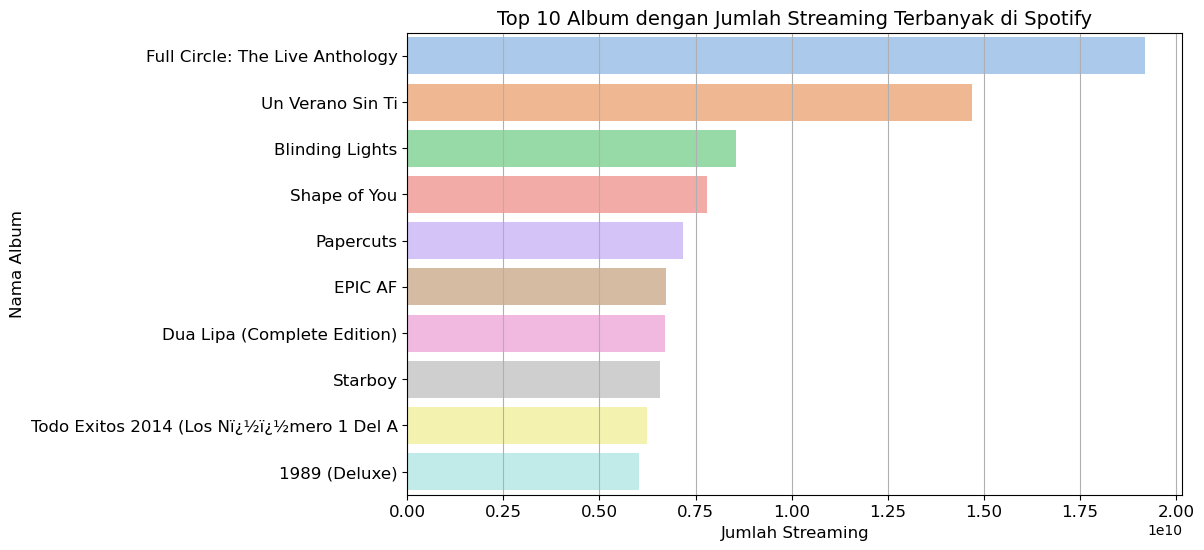

In [163]:

# Mengelompokkan data berdasarkan `Album Name` dan menghitung total streaming
album_streams = df_spotify.groupby('Album Name')['Spotify Streams'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah streaming secara menurun
album_streams = album_streams.sort_values(by='Spotify Streams', ascending=False).reset_index(drop=True)

# Mengambil top 10 album berdasarkan jumlah streaming
top_10_albums = album_streams.head(10)

# Membuat grafik batang untuk album dengan jumlah streaming terbanyak
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=top_10_albums, x='Spotify Streams', y='Album Name', palette='pastel')
plt.title('Top 10 Album dengan Jumlah Streaming Terbanyak di Spotify', fontsize=14)
plt.xlabel('Jumlah Streaming', fontsize=12)
plt.ylabel('Nama Album', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()


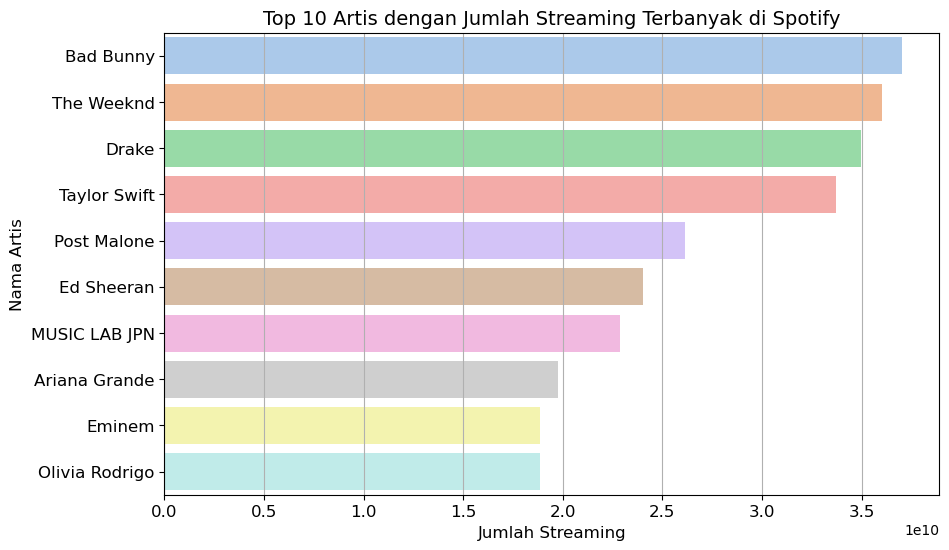

In [164]:

# Mengelompokkan data berdasarkan `Artis` dan menghitung total streaming
album_streams = df_spotify.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah streaming secara menurun
album_streams = album_streams.sort_values(by='Spotify Streams', ascending=False).reset_index(drop=True)

# Mengambil top 10 Artist berdasarkan jumlah streaming
top_10_artis = album_streams.head(10)

# Membuat grafik batang untuk artis dengan jumlah streaming terbanyak
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=top_10_artis, x='Spotify Streams', y='Artist', palette='pastel')
plt.title('Top 10 Artis dengan Jumlah Streaming Terbanyak di Spotify', fontsize=14)
plt.xlabel('Jumlah Streaming', fontsize=12)
plt.ylabel('Nama Artis', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')

plt.show()


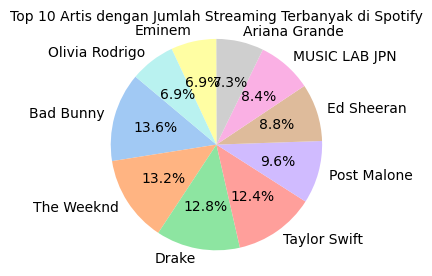

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan `Artis` dan menghitung total streaming
album_streams = df_spotify.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah streaming secara menurun
album_streams = album_streams.sort_values(by='Spotify Streams', ascending=False).reset_index(drop=True)

# Mengambil top 10 Artist berdasarkan jumlah streaming
top_10_artis = album_streams.head(10)

# Membuat grafik pie chart untuk artis dengan jumlah streaming terbanyak
plt.figure(figsize=(3, 3))
plt.pie(top_10_artis['Spotify Streams'], labels=top_10_artis['Artist'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', n_colors=10))
plt.title('Top 10 Artis dengan Jumlah Streaming Terbanyak di Spotify', fontsize=10)
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.show()


In [149]:
file_path

'D:/Spotify Songs 2024.csv'

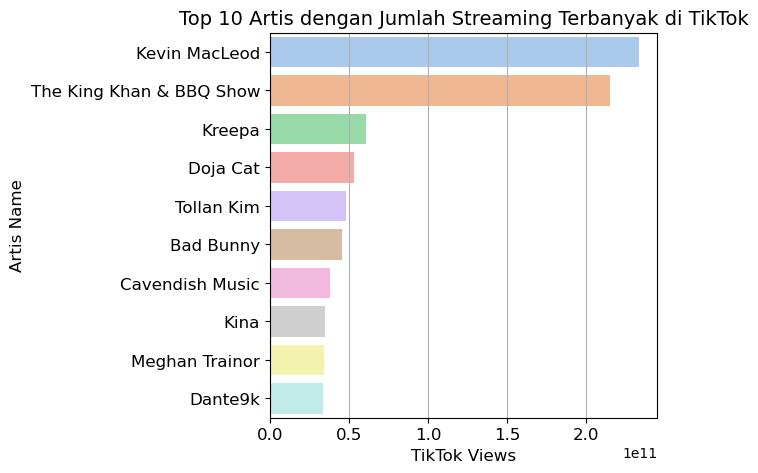

In [166]:

# Mengelompokkan data berdasarkan `Artis` dan menghitung total streaming di TikTok
album_streams = df_spotify.groupby('Artist')['TikTok Views'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah streaming secara menurun
album_streams = album_streams.sort_values(by='TikTok Views', ascending=False).reset_index(drop=True)

# Mengambil top 10 Artist berdasarkan jumlah streaming
top_10_artis = album_streams.head(10)

# Membuat grafik batang untuk artis dengan jumlah streaming terbanyak
plt.figure(figsize=(5, 5))
bar_plot = sns.barplot(data=top_10_artis, x='TikTok Views', y='Artist', palette='pastel')
plt.title('Top 10 Artis dengan Jumlah Streaming Terbanyak di TikTok', fontsize=14)
plt.xlabel('TikTok Views', fontsize=12)
plt.ylabel('Artis Name', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()


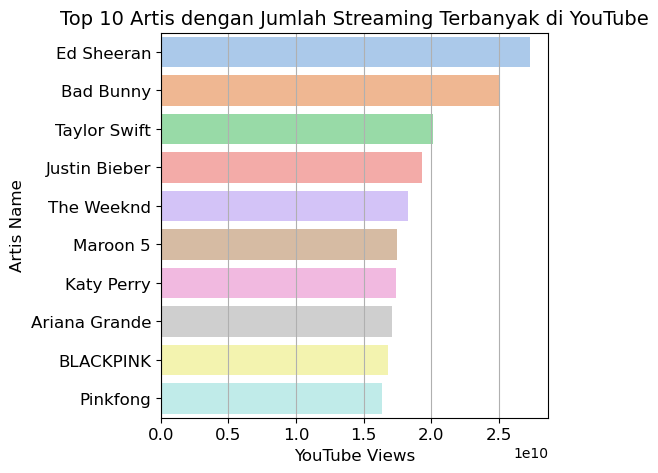

In [167]:

# Mengelompokkan data berdasarkan `Artis` dan menghitung total streaming di YouTube
album_streams = df_spotify.groupby('Artist')['YouTube Views'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah streaming secara menurun
album_streams = album_streams.sort_values(by='YouTube Views', ascending=False).reset_index(drop=True)

# Mengambil top 10 Artist berdasarkan jumlah streaming
top_10_artis = album_streams.head(10)

# Membuat grafik batang untuk artis dengan jumlah streaming terbanyak
plt.figure(figsize=(5, 5))
bar_plot = sns.barplot(data=top_10_artis, x='YouTube Views', y='Artist', palette='pastel')
plt.title('Top 10 Artis dengan Jumlah Streaming Terbanyak di YouTube', fontsize=14)
plt.xlabel('YouTube Views', fontsize=12)
plt.ylabel('Artis Name', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()
